In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\beki\Desktop\Tnx AI courses\data\sierraleone-bumbuna.csv")

In [2]:
df.isna().sum()  # Count missing values in each column

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [3]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [4]:
high_null_cols = df.columns[df.isna().mean() > 0.05]  # List columns with >5% nulls
high_null_cols

Index(['Comments'], dtype='object')

In [5]:
key_vars = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
outliers = df[(df[key_vars].abs() > 3).any(axis=1)]
print(df[key_vars].isna().sum())

GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


In [6]:
outliers = df[(df[key_vars].abs() > 3).any(axis=1)]
print(outliers)

               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb     RH   WS  WSgust  \
404     2021-10-30 06:45  1.9 -0.1  1.9   3.2   3.1  22.0   98.4  1.7     2.1   
405     2021-10-30 06:46  2.3 -0.1  2.3   3.7   3.5  22.0   98.4  1.7     2.1   
406     2021-10-30 06:47  2.8 -0.1  2.8   4.2   4.0  22.0   98.4  1.1     1.6   
407     2021-10-30 06:48  3.3 -0.1  3.3   4.8   4.6  22.0   98.5  1.4     1.9   
408     2021-10-30 06:49  3.9 -0.1  3.9   5.4   5.2  22.0   98.5  1.5     1.9   
...                  ...  ...  ...  ...   ...   ...   ...    ...  ...     ...   
525578  2022-10-29 23:39 -1.9 -0.2 -3.3   0.0   0.0  23.8  100.0  0.0     0.0   
525579  2022-10-29 23:40 -1.8 -0.1 -3.1   0.0   0.0  23.9  100.0  0.0     0.0   
525597  2022-10-29 23:58 -1.7 -0.1 -3.1   0.0   0.0  24.0  100.0  0.0     0.0   
525598  2022-10-29 23:59 -1.7 -0.2 -3.3   0.0   0.0  23.9  100.0  0.0     0.0   
525599  2022-10-30 00:00 -1.7 -0.1 -3.4   0.0   0.0  23.9  100.0  0.0     0.0   

        WSstdev     WD  WDs

In [7]:
print(df[key_vars].describe())  # Check standard stats

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB             WS         WSgust  
count  525600.000000  525600.000000  525600.000000  
mean      198.114691       1.146113       1.691606  
std       288.889073       1.239248       1.617053  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         3.400000       0.800000       1.600000  
75%    

In [8]:
print(df[key_vars].max())  # Highest Z-scores
print(df[key_vars].min())  # Lowest Z-scores

GHI       1499.0
DNI        946.0
DHI        892.0
ModA      1507.0
ModB      1473.0
WS          19.2
WSgust      23.9
dtype: float64
GHI      -19.5
DNI       -7.8
DHI      -17.9
ModA       0.0
ModB       0.0
WS         0.0
WSgust     0.0
dtype: float64


In [9]:
df.fillna(df.median(numeric_only=True), inplace=True) # Fill NaN values with median for numeric columns only

In [10]:
df.fillna(df.select_dtypes(include=["number"]).median(), inplace=True)
print("Missing values before:", df.isna().sum())
df.fillna(df.select_dtypes(include=["number"]).median(), inplace=True)
print("Missing values after:", df.isna().sum())
df.ffill(inplace=True)  # Forward fill

Missing values before: Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Missing values after: Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [11]:
df.to_csv(r"C:\Users\beki\Desktop\Tnx AI courses\data\sierraleone-bumbuna.csv", index=False)

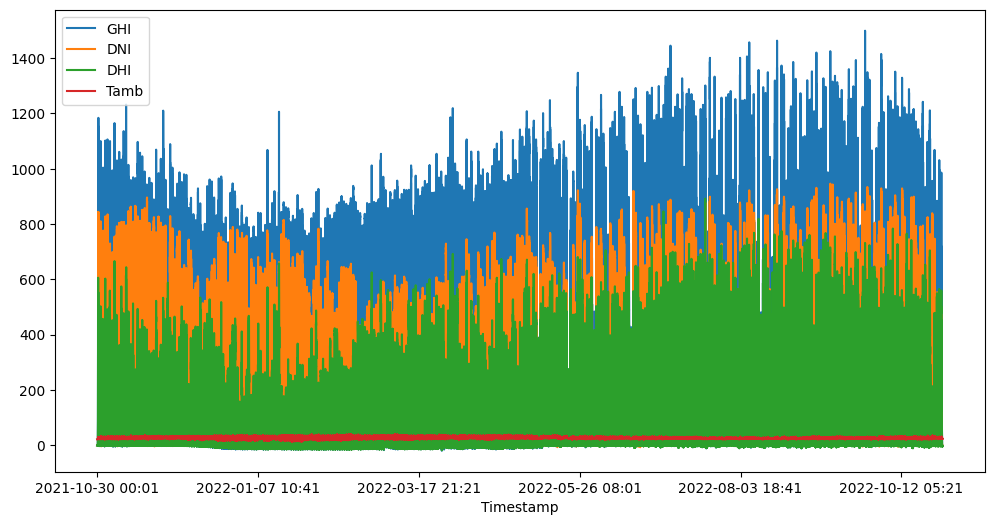

In [12]:
import matplotlib.pyplot as plt
# Line chart for solar irradiance & temperature trends
df.plot(x="Timestamp", y=["GHI", "DNI", "DHI", "Tamb"], kind="line", figsize=(12, 6))
plt.show()

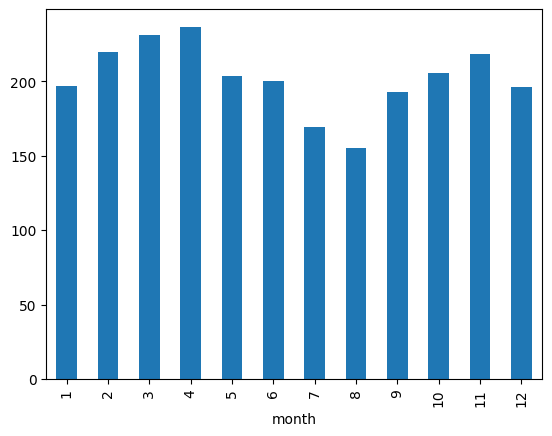

In [13]:
df["month"] = pd.to_datetime(df["Timestamp"]).dt.month
df.groupby("month")["GHI"].mean().plot(kind="bar")
plt.show()

<Axes: xlabel='Cleaning'>

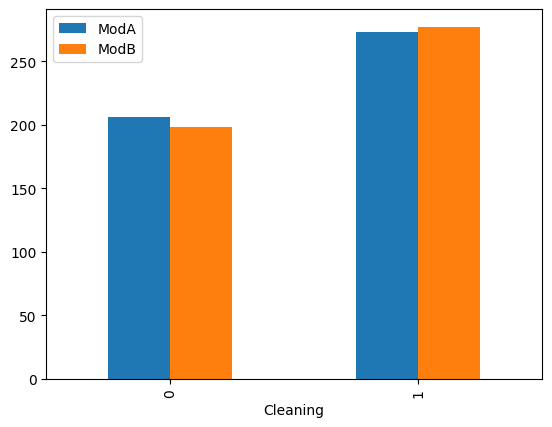

In [14]:
df.groupby("Cleaning")[["ModA", "ModB"]].mean().plot(kind="bar")

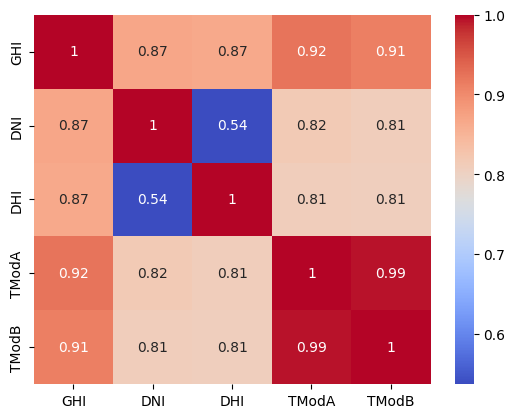

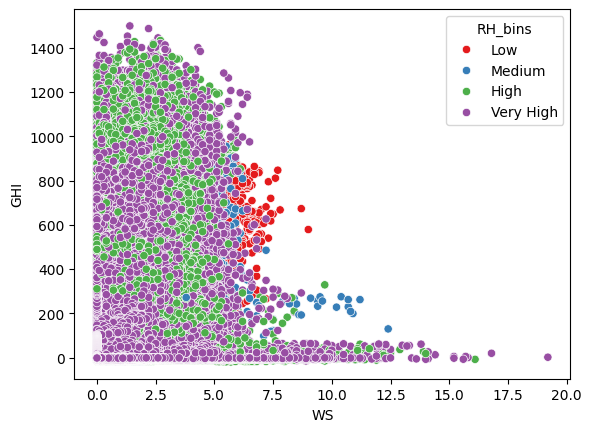

In [15]:
import seaborn as sns
# Heatmap of correlations
sns.heatmap(df[["GHI", "DNI", "DHI", "TModA", "TModB"]].corr(), annot=True, cmap="coolwarm")
plt.show()
# Create discrete bins for RH
df["RH_bins"] = pd.cut(df["RH"], bins=[0, 25, 50, 75, 100], labels=["Low", "Medium", "High", "Very High"])
# Scatter plot with distinct colors
sns.scatterplot(x=df["WS"], y=df["GHI"], hue=df["RH_bins"], palette="Set1")
plt.show()

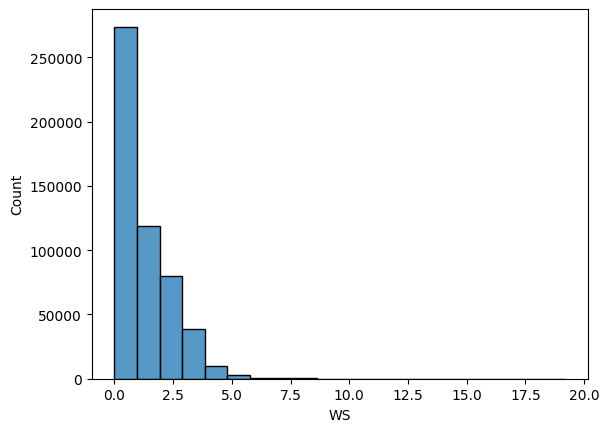

In [16]:
sns.histplot(df["WS"], bins=20)
plt.show()

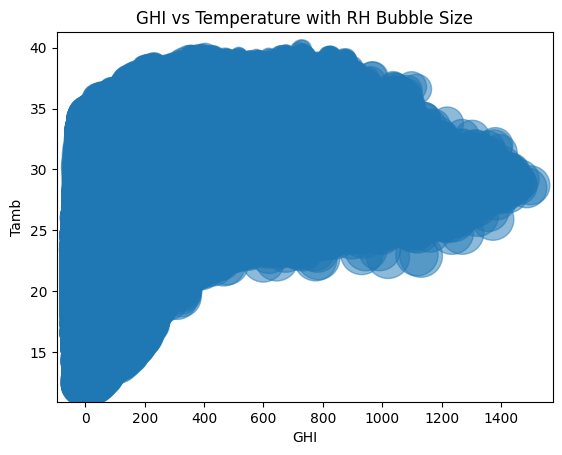

In [17]:
# Bubble chart: GHI vs. Tamb (bubble size = RH)
plt.scatter(df["GHI"], df["Tamb"], s=df["RH"]*10, alpha=0.5)
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.title("GHI vs Temperature with RH Bubble Size")
plt.show()